Loading the California Housing  Dataset and visualizing statistics (using pandas)


https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

# Access the target variable (data labels)
target = dataset.target
target_names = dataset.target_names

# Print the name of the target variable
print("target_names")
print(target_names)
# Print the feature names
print("Feature Names:")
print(feature_names)


df = pd.DataFrame(X_full, columns=feature_names)


# Calculate statistics for each feature using the describe() function
statistics = df.describe()

# Display the statistics for each feature
print(statistics)


target_names
['MedHouseVal']
Feature Names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.5697

In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

# Select the desired features
features = ["MedInc", "AveOccup"]
features_idx = [list(feature_names).index(feature) for feature in features]
X = X_full[:, features_idx]

# Create a pandas DataFrame with the selected features
df = pd.DataFrame(X, columns=features)


# Calculate statistics for each feature using the describe() function
statistics = df.describe()

# Display the statistics for each feature
print(statistics)


             MedInc      AveOccup
count  20640.000000  20640.000000
mean       3.870671      3.070655
std        1.899822     10.386050
min        0.499900      0.692308
25%        2.563400      2.429741
50%        3.534800      2.818116
75%        4.743250      3.282261
max       15.000100   1243.333333


Loading the California Housing  Dataset and visualizing statistics (without using pandas)

In [3]:
# based on https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
import numpy as np

feature_names = dataset.feature_names

feature_mapping = {
    "MedInc": "Median income in block",
    "HouseAge": "Median house age in block",
    "AveRooms": "Average number of rooms",
    "AveBedrms": "Average number of bedrooms",
    "Population": "Block population",
    "AveOccup": "Average house occupancy",
    "Latitude": "House block latitude",
    "Longitude": "House block longitude",
}
features = ["MedInc", "AveOccup"]
features_idx = [feature_names.index(feature) for feature in features]
X = X_full[:, features_idx]

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
percentiles_25 = np.percentile(X, 25, axis=0)
percentiles_50 = np.percentile(X, 50, axis=0)
percentiles_75 = np.percentile(X, 75, axis=0)

maximums = np.max(X, axis=0)
minimums = np.min(X, axis=0)

# Display the statistics for each feature
for i, feature in enumerate(features):
    print("Feature:", feature)
    print("Mean:", means[i])
    print("Standard Deviation:", stds[i])
    print("25th Percentile:", percentiles_25[i])
    print("50th Percentile (Median):", percentiles_50[i])
    print("75th Percentile:", percentiles_75[i])
    print("Maximum:", maximums[i])
    print("Minimum:", minimums[i])
    print("-" * 40)


Feature: MedInc
Mean: 3.8706710029069766
Standard Deviation: 1.8997756945748738
25th Percentile: 2.5633999999999997
50th Percentile (Median): 3.5347999999999997
75th Percentile: 4.74325
Maximum: 15.0001
Minimum: 0.4999
----------------------------------------
Feature: AveOccup
Mean: 3.0706551594363742
Standard Deviation: 10.385797959128219
25th Percentile: 2.4297411475535755
50th Percentile (Median): 2.818115654360196
75th Percentile: 3.2822609242736216
Maximum: 1243.3333333333333
Minimum: 0.6923076923076923
----------------------------------------


Visualizing data after and before the normalization

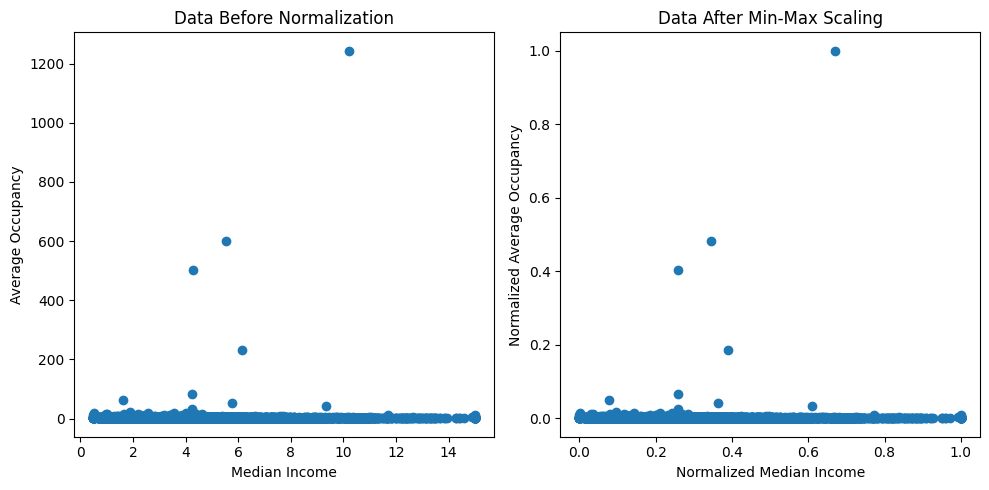

         MedInc  AveOccup
count 20640.000 20640.000
mean      0.232     0.002
std       0.131     0.008
min       0.000     0.000
25%       0.142     0.001
50%       0.209     0.002
75%       0.293     0.002
max       1.000     1.000


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

# Select the desired features
features = ["MedInc", "AveOccup"]
features_idx = [list(feature_names).index(feature) for feature in features]
X = X_full[:, features_idx]
df = pd.DataFrame(X_full, columns=feature_names)
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the selected features
X_scaled = scaler.fit_transform(X)

# Plot the data before and after normalization
plt.figure(figsize=(10, 5))

# Plot the data before normalization
plt.subplot(1, 2, 1)
plt.scatter(df["MedInc"], df["AveOccup"])
plt.xlabel("Median Income")
plt.ylabel("Average Occupancy")
plt.title("Data Before Normalization")

# Plot the data after normalization
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.xlabel("Normalized Median Income")
plt.ylabel("Normalized Average Occupancy")
plt.title("Data After Min-Max Scaling")

plt.tight_layout()
plt.show()

df_scaled = pd.DataFrame(X_scaled, columns=features)
statistics = df_scaled.describe()
pd.options.display.float_format = "{:.3f}".format
# Display the statistics for each feature
print(statistics)

X_MinMaxScaler = X_scaled


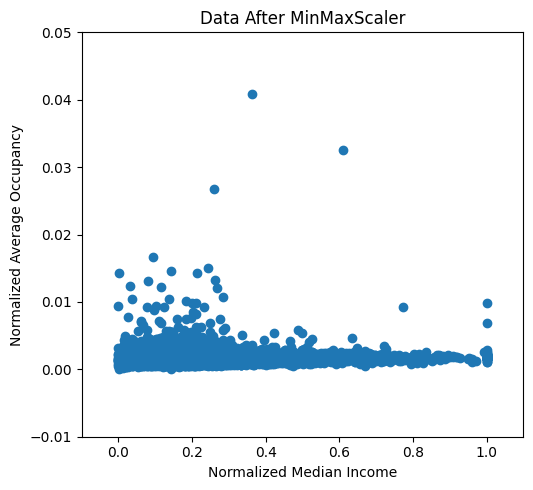

In [5]:
# Plot the data before and after normalization
plt.figure(figsize=(10, 5))


# Plot the data after normalization
plt.subplot(1, 2, 2)
plt.scatter(X_MinMaxScaler[:, 0], X_MinMaxScaler[:, 1])
plt.xlabel("Normalized Median Income")
plt.ylabel("Normalized Average Occupancy")
plt.title("Data After MinMaxScaler")
plt.ylim(-0.01, 0.05)  # Set the y-axis limits for zooming
plt.xlim(-0.1, 1.1)  # Set the x-axis limits for zooming
plt.tight_layout()
plt.show()

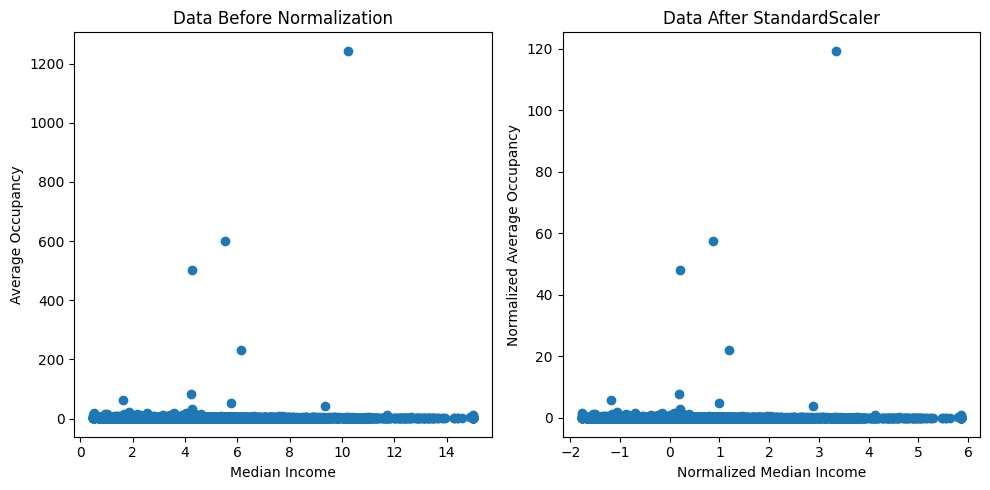

         MedInc  AveOccup
count 20640.000 20640.000
mean      0.000     0.000
std       1.000     1.000
min      -1.774    -0.229
25%      -0.688    -0.062
50%      -0.177    -0.024
75%       0.459     0.020
max       5.858   119.419


In [6]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

# Select the desired features
features = ["MedInc", "AveOccup"]
features_idx = [list(feature_names).index(feature) for feature in features]
X = X_full[:, features_idx]
df = pd.DataFrame(X_full, columns=feature_names)

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler Scaling to the selected features
X_scaled = scaler.fit_transform(X)

# Plot the data before and after normalization
plt.figure(figsize=(10, 5))

# Plot the data before normalization
plt.subplot(1, 2, 1)
plt.scatter(df["MedInc"], df["AveOccup"])
plt.xlabel("Median Income")
plt.ylabel("Average Occupancy")
plt.title("Data Before Normalization")

# Plot the data after normalization
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.xlabel("Normalized Median Income")
plt.ylabel("Normalized Average Occupancy")
plt.title("Data After StandardScaler")

plt.tight_layout()
plt.show()


df_scaled = pd.DataFrame(X_scaled, columns=features)
statistics = df_scaled.describe()

pd.options.display.float_format = "{:.3f}".format

# Display the statistics for each feature
print(statistics)

X_StandardScaler = X_scaled


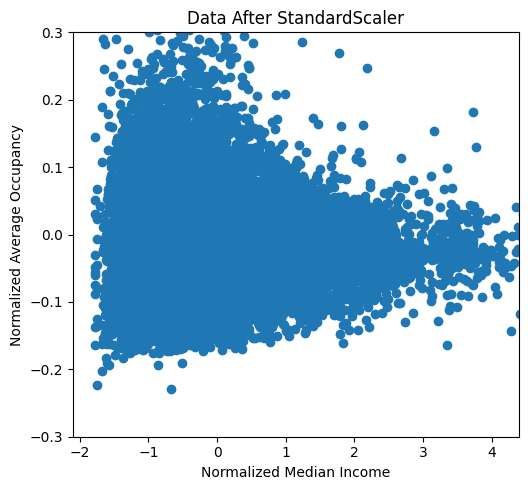

In [7]:
# Plot the data before and after normalization
plt.figure(figsize=(10, 5))


# Plot the data after normalization
plt.subplot(1, 2, 2)
plt.scatter(X_StandardScaler[:, 0], X_StandardScaler[:, 1])
plt.xlabel("Normalized Median Income")
plt.ylabel("Normalized Average Occupancy")
plt.title("Data After StandardScaler")
plt.ylim(-0.3, 0.3)  # Set the x-axis limits for zooming
plt.xlim(-2.1, 4.4)  # Set the y-axis limits for zooming
plt.tight_layout()
plt.show()

Scale features using statistics that are robust to outliers.

It involves eliminating the median and rescaling the data based on the interquartile range (IQR), which is the range between the 25th and 75th percentiles (1st quartile and 3rd quartile, respectively).

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler


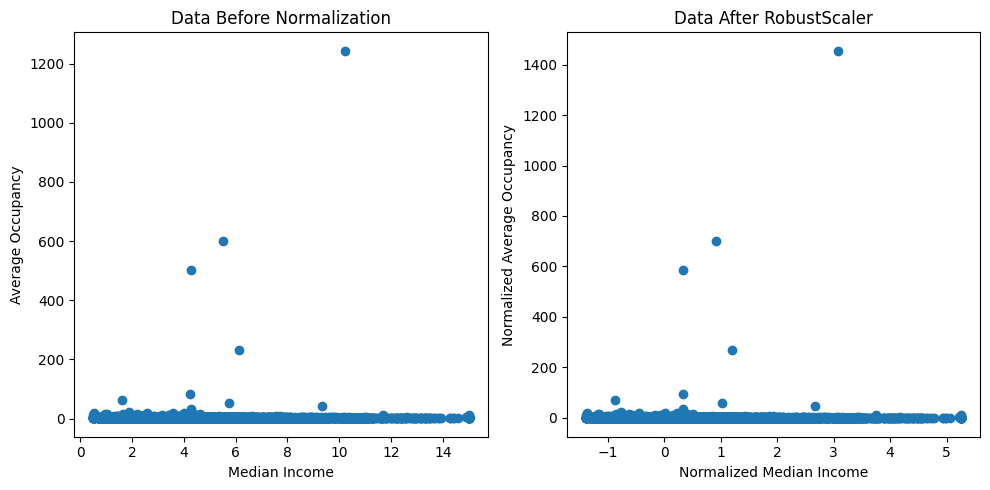

         MedInc  AveOccup
count 20640.000 20640.000
mean      0.154     0.296
std       0.872    12.183
min      -1.392    -2.494
25%      -0.446    -0.456
50%       0.000     0.000
75%       0.554     0.544
max       5.260  1455.116


In [8]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import RobustScaler

# Load the California housing dataset
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

# Select the desired features
features = ["MedInc", "AveOccup"]
features_idx = [list(feature_names).index(feature) for feature in features]
X = X_full[:, features_idx]
df = pd.DataFrame(X_full, columns=feature_names)
# Initialize the RobustScaler
scaler = RobustScaler(quantile_range=(25, 75))


# Apply RobustScaler Scaling to the selected features
X_scaled = scaler.fit_transform(X)

# Plot the data before and after normalization
plt.figure(figsize=(10, 5))

# Plot the data before normalization
plt.subplot(1, 2, 1)
plt.scatter(df["MedInc"], df["AveOccup"])
plt.xlabel("Median Income")
plt.ylabel("Average Occupancy")
plt.title("Data Before Normalization")

# Plot the data after normalization
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.xlabel("Normalized Median Income")
plt.ylabel("Normalized Average Occupancy")
plt.title("Data After RobustScaler")

plt.tight_layout()
plt.show()


df_scaled = pd.DataFrame(X_scaled, columns=features)
statistics = df_scaled.describe()

pd.options.display.float_format = "{:.3f}".format

# Display the statistics for each feature
print(statistics)

X_RobustScaler = X_scaled


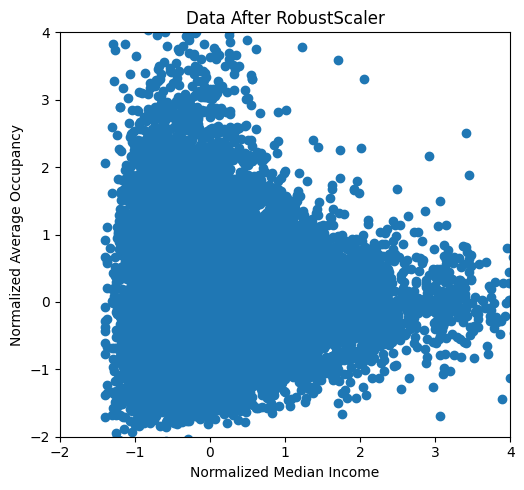

In [9]:
# Plot the data before and after normalization
plt.figure(figsize=(10, 5))


# Plot the data after normalization
plt.subplot(1, 2, 2)
plt.scatter(X_RobustScaler[:, 0], X_RobustScaler[:, 1])
plt.xlabel("Normalized Median Income")
plt.ylabel("Normalized Average Occupancy")
plt.title("Data After RobustScaler")
plt.ylim(-2, 4)  # Set the y-axis limits for zooming
plt.xlim(-2, 4)  # Set the x-axis limits for zooming
plt.tight_layout()
plt.show()

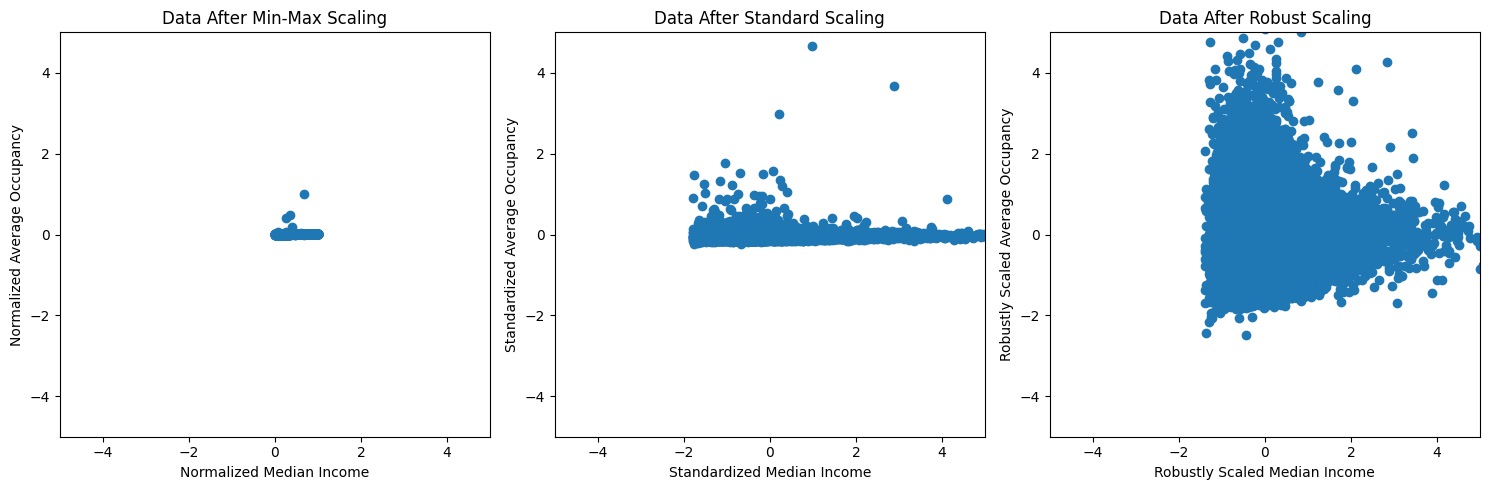

In [10]:
# Plot the data after different scaling methods
plt.figure(figsize=(15, 5))

# Plot the data after Min-Max Scaling
plt.subplot(1, 3, 1)
plt.scatter(X_MinMaxScaler[:, 0], X_MinMaxScaler[:, 1])
plt.xlim(-5, 5)  # Set the x-axis limits for zooming
plt.ylim(-5, 5)  # Set the y-axis limits for zooming
plt.xlabel("Normalized Median Income")
plt.ylabel("Normalized Average Occupancy")
plt.title("Data After Min-Max Scaling")

# Plot the data after Standard Scaling
plt.subplot(1, 3, 2)
plt.scatter(X_StandardScaler[:, 0], X_StandardScaler[:, 1])
plt.xlim(-5, 5)  # Set the x-axis limits for zooming
plt.ylim(-5, 5)  # Set the y-axis limits for zooming
plt.xlabel("Standardized Median Income")
plt.ylabel("Standardized Average Occupancy")
plt.title("Data After Standard Scaling")

# Plot the data after Robust Scaling
plt.subplot(1, 3, 3)
plt.scatter(X_RobustScaler[:, 0], X_RobustScaler[:, 1])
plt.xlim(-5, 5)  # Set the x-axis limits for zooming
plt.ylim(-5, 5)  # Set the y-axis limits for zooming
plt.xlabel("Robustly Scaled Median Income")
plt.ylabel("Robustly Scaled Average Occupancy")
plt.title("Data After Robust Scaling")

plt.tight_layout()
plt.show()


QuantileTransformer (uniform output)

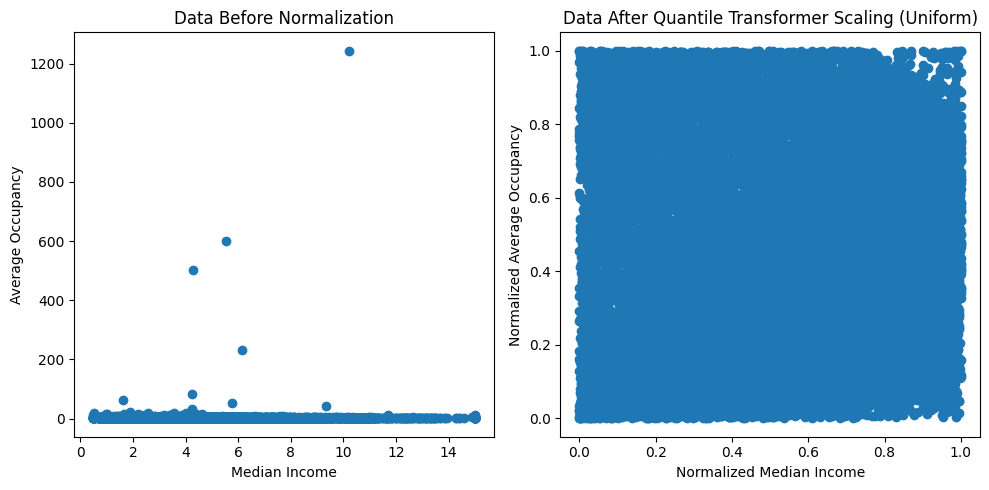

         MedInc  AveOccup
count 20640.000 20640.000
mean      0.499     0.500
std       0.289     0.288
min       0.000     0.000
25%       0.247     0.250
50%       0.498     0.500
75%       0.749     0.747
max       1.000     1.000


In [11]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import QuantileTransformer

# Load the California housing dataset
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

# Select the desired features
features = ["MedInc", "AveOccup"]
features_idx = [list(feature_names).index(feature) for feature in features]
X = X_full[:, features_idx]
df = pd.DataFrame(X_full, columns=feature_names)
# Initialize the Scaler
scaler = QuantileTransformer(output_distribution="uniform")

# Apply Scaling to the selected features
X_scaled = scaler.fit_transform(X)

# Plot the data before and after normalization
plt.figure(figsize=(10, 5))

# Plot the data before normalization
plt.subplot(1, 2, 1)
plt.scatter(df["MedInc"], df["AveOccup"])
plt.xlabel("Median Income")
plt.ylabel("Average Occupancy")
plt.title("Data Before Normalization")

# Plot the data after normalization
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.xlabel("Normalized Median Income")
plt.ylabel("Normalized Average Occupancy")
plt.title("Data After Quantile Transformer Scaling (Uniform)")

plt.tight_layout()
plt.show()

df_scaled = pd.DataFrame(X_scaled, columns=features)
statistics = df_scaled.describe()
pd.options.display.float_format = "{:.3f}".format
# Display the statistics for each feature
print(statistics)

X_QuantileTransformer = X_scaled


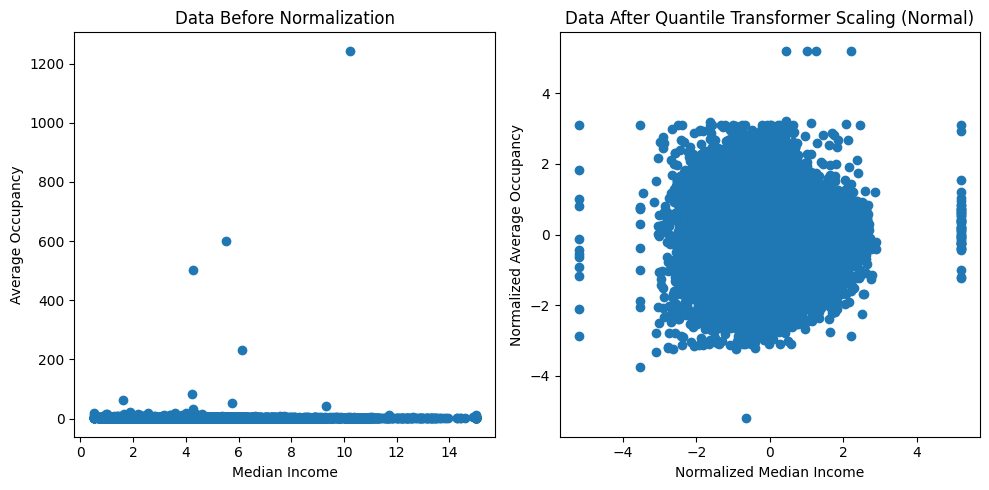

         MedInc  AveOccup
count 20640.000 20640.000
mean      0.004    -0.005
std       1.025     1.006
min      -5.199    -5.199
25%      -0.669    -0.685
50%       0.006    -0.003
75%       0.685     0.680
max       5.199     5.199


In [12]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import QuantileTransformer

# Load the California housing dataset
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

# Select the desired features
features = ["MedInc", "AveOccup"]
features_idx = [list(feature_names).index(feature) for feature in features]
X = X_full[:, features_idx]
df = pd.DataFrame(X_full, columns=feature_names)
# Initialize the Scaler
scaler = QuantileTransformer(output_distribution="normal")

# Apply Scaling to the selected features
X_scaled = scaler.fit_transform(X)

# Plot the data before and after normalization
plt.figure(figsize=(10, 5))

# Plot the data before normalization
plt.subplot(1, 2, 1)
plt.scatter(df["MedInc"], df["AveOccup"])
plt.xlabel("Median Income")
plt.ylabel("Average Occupancy")
plt.title("Data Before Normalization")

# Plot the data after normalization
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.xlabel("Normalized Median Income")
plt.ylabel("Normalized Average Occupancy")
plt.title("Data After Quantile Transformer Scaling (Normal)")

plt.tight_layout()
plt.show()

df_scaled = pd.DataFrame(X_scaled, columns=features)
statistics = df_scaled.describe()
pd.options.display.float_format = "{:.3f}".format
# Display the statistics for each feature
print(statistics)

X_QuantileTransformer = X_scaled
